In [1]:
# Библиотеки
import pandas as pd
pd.set_option('display.max_rows', 550)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500)
from nltk.stem import SnowballStemmer 
from pymystem3 import Mystem
import datetime
from io import BytesIO
import requests
import re
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
import seaborn as sns
import plotly.express as px
import warnings as warning
warning.filterwarnings('ignore')
import statistics


In [2]:
path_1 = 'D://Kseniia//AV//' 
data = pd.read_csv(path_1 + 'AV_bq-results-20210713_red.csv')
sourse = pd.read_csv(path_1 + 'AV_bq-sourse-20210805_red.csv')

In [3]:
# Основная информация о таблице
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862106 entries, 0 to 1862105
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   transaction_id  int64  
 2   reciept_cost    float64
 3   deliveryZone    object 
 4   comments        float64
 5   cat_delv        object 
 6   date            object 
dtypes: float64(2), int64(2), object(3)
memory usage: 99.4+ MB


user_id  transaction_id  reciept_cost deliveryZone  comments  \
0  8903271874564      1779863839       5613.30           mo       NaN   
1  8848493969412      1792865067       5787.00           mo       NaN   
2  8906460135428      1786615161       8728.00           mo       NaN   
3  8912425451524      1794672582       4049.32           mo       NaN   
4  8904413380612      1780003217       4477.00           mo       NaN   
5  8947878887428      1794696215       8050.00           mo       NaN   
6  8907171921924      1781576459       4171.90           mo       NaN   
7  8900968775684      1791471630       6987.60           mo       NaN   
8  8899019898884      1793805778       5819.40           mo       NaN   
9  8801222590468      1791560735       8297.82           mo       NaN   

      cat_delv        date  
0  storage_msk  2021-01-11  
1  storage_msk  2021-01-11  
2  storage_msk  2021-01-11  
3  storage_msk  2021-01-11  
4  storage_msk  2021-01-11  
5  storage_msk  2021-01-11  
6  storage_msk  2021-01-11  
7  storage_msk  2021-01-11  
8  storage_msk  2021-01-11  
9  storage_msk  2021-01-11

In [4]:
# Основная информация о таблице
sourse.info()
display(sourse.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456095 entries, 0 to 456094
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     456095 non-null  int64 
 1   date        456095 non-null  object
 2   dataSource  456095 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.4+ MB


user_id        date dataSource
0  8902736969732  2020-10-23        web
1  8918663593988  2020-10-23        web
2  8831778455556  2020-10-23        app
3  8801087946756  2020-10-22        web
4  8844264996868  2020-10-22        web
5  8852436287492  2020-10-22        web
6  8918654976004  2020-10-22        web
7  8918551592964  2020-10-22        web
8  8802596585476  2020-10-23     mobile
9  8930759409668  2020-10-23        app

In [5]:
sourse['date'] = sourse['date'].astype('datetime64[D]')

In [6]:
data = data[data['reciept_cost']>0]
data.describe()

user_id  transaction_id  reciept_cost  comments
count  1.861864e+06    1.861864e+06  1.861864e+06       0.0
mean   8.835565e+12    1.582689e+09  6.243952e+03       NaN
std    4.609720e+10    1.495300e+08  6.844745e+03       NaN
min    8.796159e+12    8.168250e+05  1.250000e+01       NaN
25%    8.802486e+12    1.502715e+09  3.134000e+03       NaN
50%    8.803968e+12    1.535994e+09  4.873965e+03       NaN
75%    8.865332e+12    1.699402e+09  7.486205e+03       NaN
max    8.973010e+12    1.879127e+09  2.833930e+06       NaN

In [7]:
# Посмотрим на поведение клиентов за год
orders = data[['user_id', 'date', 'reciept_cost', 'cat_delv']]
orders['date'] = orders['date'].astype('datetime64[D]')
orders = orders.query('date > "2020-07-13"')
print(orders['date'].min())
print(orders['date'].max())

2020-07-14 00:00:00
2021-07-13 00:00:00


In [8]:
# Дата совершения первого события пользователя в сервисе
min_month_order = orders.groupby(['user_id', 'cat_delv'])['date'].min()
min_month_order.name = 'min_month_order'
min_month_order = min_month_order.reset_index()
orders = orders.merge(min_month_order,on=['user_id', 'cat_delv'], how = 'left')
orders['min_date_order'] = orders['min_month_order'].astype('datetime64[D]')
orders['min_month_order'] = orders['min_month_order'].astype('datetime64[M]')

#orders['order_month'] = orders['date'].astype('datetime64[M]')
orders.sort_values(by = 'user_id')

user_id       date  reciept_cost     cat_delv min_month_order  \
400387  8799688032260 2021-02-18       17549.7  storage_msk      2020-10-01   
362932  8799688032260 2020-12-27       14160.0     omni_msk      2020-10-01   
362931  8799688032260 2020-12-11       10913.1     omni_msk      2020-10-01   
362930  8799688032260 2020-12-08       11034.7     omni_msk      2020-10-01   
377531  8799688032260 2021-07-01       10604.6     omni_msk      2020-10-01   
...               ...        ...           ...          ...             ...   
32321   8972989792260 2021-07-13         187.0     omni_msk      2021-07-01   
184579  8972989792260 2021-07-13         602.0     omni_msk      2021-07-01   
32785   8973008011268 2021-07-12       10180.5     omni_msk      2021-07-01   
33642   8973009223684 2021-07-12        1578.1     omni_msk      2021-07-01   
33641   8973010206724 2021-07-12        3025.0     omni_msk      2021-07-01   

       min_date_order  
400387     2020-10-07  
362932     2020-10-08  
362931     2020-10-08  
362930     2020-10-08  
377531     2020-10-08  
...               ...  
32321      2021-07-13  
184579     2021-07-13  
32785      2021-07-12  
33642      2021-07-12  
33641      2021-07-12  

[456034 rows x 6 columns]

In [9]:
# Сгруппируем датафрейм по пользователям и подсчитаем количество уникальных сервисов:
count_cat_delv_by_users = orders.groupby(['user_id']).agg({'cat_delv':'nunique'}).reset_index()
count_cat_delv_by_users = count_cat_delv_by_users.rename(columns={'cat_delv':'number_cat_delv'})
count_cat_delv_by_users['number_cat_delv'].value_counts()


1    68846
2    15755
3      661
4       84
5        4
Name: number_cat_delv, dtype: int64

In [10]:
# Разделим пользователей по целевому поведению

#  Список пользователей с 1 видом сервиса
count_cat_delv_by_users['is_target_behavior'] = (count_cat_delv_by_users['number_cat_delv'] < 2)
user_ids_with_target_behavior_1 = count_cat_delv_by_users[count_cat_delv_by_users['is_target_behavior']]['user_id'].unique()

#  Список пользователей с 2 и более видами видом сервиса
count_cat_delv_by_users['is_target_behavior'] = (count_cat_delv_by_users['number_cat_delv'] >= 2)
user_ids_with_target_behavior_2 = count_cat_delv_by_users[count_cat_delv_by_users['is_target_behavior']]['user_id'].unique()

В основном датафрейме разделим пользователей на 2 группы:
- Клиенты, которые пользовались 1 видом сервиса;
- Клиенты, которые пользовались 2 и более видами сервиса

In [11]:
# Поведение пользователей с 2 и более видами видом сервиса
user_cat_delv_2 = orders[orders['user_id'].isin(user_ids_with_target_behavior_2)]
user_cat_delv_2

user_id       date  reciept_cost     cat_delv min_month_order  \
0       8903271874564 2021-01-11       5613.30  storage_msk      2020-08-01   
1       8848493969412 2021-01-11       5787.00  storage_msk      2020-07-01   
4       8904413380612 2021-01-11       4477.00  storage_msk      2020-09-01   
8       8899019898884 2021-01-11       5819.40  storage_msk      2020-07-01   
10      8847277817860 2021-01-11      15321.10  storage_msk      2020-08-01   
...               ...        ...           ...          ...             ...   
455987  8950210527236 2021-02-16       1359.15       pickup      2021-02-01   
455998  8951611228164 2021-02-18       2580.00       pickup      2021-02-01   
456012  8952173461508 2021-04-16       1258.60       pickup      2021-04-01   
456018  8953645432836 2021-05-17      36828.00       pickup      2021-03-01   
456026  8959016861700 2021-05-30       2070.00       pickup      2021-05-01   

       min_date_order  
0          2020-08-25  
1          2020-07-20  
4          2020-09-24  
8          2020-07-19  
10         2020-08-26  
...               ...  
455987     2021-02-16  
455998     2021-02-18  
456012     2021-04-16  
456018     2021-03-28  
456026     2021-05-30  

[254002 rows x 6 columns]

In [12]:
# Определяем даты начала пользования сервисом
consumer_behavior_2 = user_cat_delv_2.groupby(['user_id', 'cat_delv'])[['min_date_order', 'min_month_order']].min().reset_index()
consumer_behavior_2

user_id     cat_delv min_date_order min_month_order
0      8799688032260     omni_msk     2020-10-08      2020-10-01
1      8799688032260  storage_msk     2020-10-07      2020-10-01
2      8799688458244     omni_msk     2020-12-06      2020-12-01
3      8799688458244  storage_msk     2020-07-23      2020-07-01
4      8799688523780     omni_msk     2020-11-04      2020-11-01
...              ...          ...            ...             ...
33844  8972436045828  storage_msk     2021-07-06      2021-07-01
33845  8972494405636     omni_msk     2021-07-06      2021-07-01
33846  8972494405636  storage_msk     2021-07-12      2021-07-01
33847  8972780896260         spec     2021-07-11      2021-07-01
33848  8972780896260  storage_msk     2021-07-09      2021-07-01

[33849 rows x 4 columns]

In [13]:
# Столбцы с датами начала использования нового сервиса
behavior_2 = count_cat_delv_by_users['user_id']
sort_consumer_behavior_2 = consumer_behavior_2[
        consumer_behavior_2['user_id'].isin(behavior_2)].sort_values(by = 'min_month_order')


behavior_2_group = sort_consumer_behavior_2.groupby(['user_id']).agg({'cat_delv': ['unique', 'count'], 
                                                                      'min_date_order': 'unique', 
                                                                      'min_month_order': 'unique'}).reset_index().reset_index()
behavior_2_group.columns=['index','user_id', 'cat_delv', 'cat_num','min_date_order' , 'min_month_order']

behavior_2_group

index        user_id                 cat_delv  cat_num  \
0          0  8799688032260  [omni_msk, storage_msk]        2   
1          1  8799688458244  [storage_msk, omni_msk]        2   
2          2  8799688523780  [omni_msk, storage_msk]        2   
3          3  8799689539588  [storage_msk, omni_msk]        2   
4          4  8799692226564  [storage_msk, omni_msk]        2   
...      ...            ...                      ...      ...   
16499  16499  8972352454660      [storage_msk, spec]        2   
16500  16500  8972352847876  [storage_msk, omni_msk]        2   
16501  16501  8972436045828  [omni_msk, storage_msk]        2   
16502  16502  8972494405636  [storage_msk, omni_msk]        2   
16503  16503  8972780896260      [spec, storage_msk]        2   

                                                       min_date_order  \
0      [2020-10-08T00:00:00.000000000, 2020-10-07T00:00:00.000000000]   
1      [2020-07-23T00:00:00.000000000, 2020-12-06T00:00:00.000000000]   
2      [2020-11-04T00:00:00.000000000, 2020-11-07T00:00:00.000000000]   
3                                     [2020-10-10T00:00:00.000000000]   
4      [2020-11-21T00:00:00.000000000, 2021-06-10T00:00:00.000000000]   
...                                                               ...   
16499                                 [2021-07-03T00:00:00.000000000]   
16500                                 [2021-07-04T00:00:00.000000000]   
16501                                 [2021-07-06T00:00:00.000000000]   
16502  [2021-07-12T00:00:00.000000000, 2021-07-06T00:00:00.000000000]   
16503  [2021-07-11T00:00:00.000000000, 2021-07-09T00:00:00.000000000]   

                                                      min_month_order  
0                                     [2020-10-01T00:00:00.000000000]  
1      [2020-07-01T00:00:00.000000000, 2020-12-01T00:00:00.000000000]  
2                                     [2020-11-01T00:00:00.000000000]  
3                                     [2020-10-01T00:00:00.000000000]  
4      [2020-11-01T00:00:00.000000000, 2021-06-01T00:00:00.000000000]  
...                                                               ...  
16499                                 [2021-07-01T00:00:00.000000000]  
16500                                 [2021-07-01T00:00:00.000000000]  
16501                                 [2021-07-01T00:00:00.000000000]  
16502                                 [2021-07-01T00:00:00.000000000]  
16503                                 [2021-07-01T00:00:00.000000000]  

[16504 rows x 6 columns]

In [14]:
# Чистим данные по датам
behavior_2_split_date = behavior_2_group['min_date_order'].astype('str')

behavior_2_split_date = behavior_2_split_date.str.split("'",  expand=True)
behavior_2_split_date.columns = ['0', 'date_cat_delv_1', '2', 'date_cat_delv_2', '4',  'date_cat_delv_3', '6', 'date_cat_delv_4', '8', 'date_cat_delv_5' , '10']
behavior_2_split_date.drop(['0', '2', '4', '6', '8', '10'], inplace=True, axis=1)
behavior_2_split_date = behavior_2_split_date.reset_index()


behavior_2_split_date

index                date_cat_delv_1                date_cat_delv_2  \
0          0  2020-10-08T00:00:00.000000000  2020-10-07T00:00:00.000000000   
1          1  2020-07-23T00:00:00.000000000  2020-12-06T00:00:00.000000000   
2          2  2020-11-04T00:00:00.000000000  2020-11-07T00:00:00.000000000   
3          3  2020-10-10T00:00:00.000000000                           None   
4          4  2020-11-21T00:00:00.000000000  2021-06-10T00:00:00.000000000   
...      ...                            ...                            ...   
16499  16499  2021-07-03T00:00:00.000000000                           None   
16500  16500  2021-07-04T00:00:00.000000000                           None   
16501  16501  2021-07-06T00:00:00.000000000                           None   
16502  16502  2021-07-12T00:00:00.000000000  2021-07-06T00:00:00.000000000   
16503  16503  2021-07-11T00:00:00.000000000  2021-07-09T00:00:00.000000000   

      date_cat_delv_3 date_cat_delv_4 date_cat_delv_5  
0                None            None            None  
1                None            None            None  
2                None            None            None  
3                None            None            None  
4                None            None            None  
...               ...             ...             ...  
16499            None            None            None  
16500            None            None            None  
16501            None            None            None  
16502            None            None            None  
16503            None            None            None  

[16504 rows x 6 columns]

In [15]:
# пропуски
behavior_2_split_date.loc[behavior_2_split_date[
    'date_cat_delv_2'].isna(),'date_cat_delv_2'] = behavior_2_split_date['date_cat_delv_1']

behavior_3 = behavior_2_group.query('cat_num==3')['index'] #пользователи 3х сервисов
behavior_2_split_date.loc[(behavior_2_split_date[
    'date_cat_delv_3'].isna()) & (behavior_2_split_date['index'].isin(behavior_3)),'date_cat_delv_3'] = behavior_2_split_date['date_cat_delv_2']

behavior_4 = behavior_2_group.query('cat_num==4')['index'] #пользователи 4х сервисов
behavior_2_split_date.loc[(behavior_2_split_date[
    'date_cat_delv_4'].isna()) & (behavior_2_split_date['index'].isin(behavior_4)),'date_cat_delv_4'] = behavior_2_split_date['date_cat_delv_3']

behavior_5 = behavior_2_group.query('cat_num==5')['index'] #пользователи 5 сервисов
behavior_2_split_date.loc[(behavior_2_split_date[
    'date_cat_delv_4'].isna()) & (behavior_2_split_date['index'].isin(behavior_5)),'date_cat_delv_5'] = behavior_2_split_date['date_cat_delv_4']
behavior_2_split_date.head()

index                date_cat_delv_1                date_cat_delv_2  \
0      0  2020-10-08T00:00:00.000000000  2020-10-07T00:00:00.000000000   
1      1  2020-07-23T00:00:00.000000000  2020-12-06T00:00:00.000000000   
2      2  2020-11-04T00:00:00.000000000  2020-11-07T00:00:00.000000000   
3      3  2020-10-10T00:00:00.000000000  2020-10-10T00:00:00.000000000   
4      4  2020-11-21T00:00:00.000000000  2021-06-10T00:00:00.000000000   

  date_cat_delv_3 date_cat_delv_4 date_cat_delv_5  
0            None            None            None  
1            None            None            None  
2            None            None            None  
3            None            None            None  
4            None            None            None

In [16]:
behavior_2_split_date.drop('index', inplace=True, axis=1)

for i in behavior_2_split_date.columns:
    behavior_2_split_date[i] = pd.to_datetime(behavior_2_split_date[i])
        


behavior_2_split_date.head()

date_cat_delv_1 date_cat_delv_2 date_cat_delv_3 date_cat_delv_4  \
0      2020-10-08      2020-10-07             NaT             NaT   
1      2020-07-23      2020-12-06             NaT             NaT   
2      2020-11-04      2020-11-07             NaT             NaT   
3      2020-10-10      2020-10-10             NaT             NaT   
4      2020-11-21      2021-06-10             NaT             NaT   

  date_cat_delv_5  
0             NaT  
1             NaT  
2             NaT  
3             NaT  
4             NaT

In [17]:
# Чистим данные по сервисам
behavior_2_split_cat = behavior_2_group['cat_delv'].astype('str')
behavior_2_split_cat = behavior_2_split_cat.str.split("'",  expand=True)
behavior_2_split_cat.columns = ['0', 'cat_delv_1', '2', 'cat_delv_2', '4',  'cat_delv_3', '6', 'cat_delv_4', '8', 'cat_delv_5' , '10']
behavior_2_split_cat.drop(['0', '2', '4', '6', '8', '10'], inplace=True, axis=1)
behavior_2_split_cat = behavior_2_split_cat.fillna('')

In [18]:
ARPU_data = behavior_2_group.join(behavior_2_split_date, how= 'left')
ARPU_data = ARPU_data.join(behavior_2_split_cat, how= 'left')
ARPU_data

index        user_id                 cat_delv  cat_num  \
0          0  8799688032260  [omni_msk, storage_msk]        2   
1          1  8799688458244  [storage_msk, omni_msk]        2   
2          2  8799688523780  [omni_msk, storage_msk]        2   
3          3  8799689539588  [storage_msk, omni_msk]        2   
4          4  8799692226564  [storage_msk, omni_msk]        2   
...      ...            ...                      ...      ...   
16499  16499  8972352454660      [storage_msk, spec]        2   
16500  16500  8972352847876  [storage_msk, omni_msk]        2   
16501  16501  8972436045828  [omni_msk, storage_msk]        2   
16502  16502  8972494405636  [storage_msk, omni_msk]        2   
16503  16503  8972780896260      [spec, storage_msk]        2   

                                                       min_date_order  \
0      [2020-10-08T00:00:00.000000000, 2020-10-07T00:00:00.000000000]   
1      [2020-07-23T00:00:00.000000000, 2020-12-06T00:00:00.000000000]   
2      [2020-11-04T00:00:00.000000000, 2020-11-07T00:00:00.000000000]   
3                                     [2020-10-10T00:00:00.000000000]   
4      [2020-11-21T00:00:00.000000000, 2021-06-10T00:00:00.000000000]   
...                                                               ...   
16499                                 [2021-07-03T00:00:00.000000000]   
16500                                 [2021-07-04T00:00:00.000000000]   
16501                                 [2021-07-06T00:00:00.000000000]   
16502  [2021-07-12T00:00:00.000000000, 2021-07-06T00:00:00.000000000]   
16503  [2021-07-11T00:00:00.000000000, 2021-07-09T00:00:00.000000000]   

                                                      min_month_order  \
0                                     [2020-10-01T00:00:00.000000000]   
1      [2020-07-01T00:00:00.000000000, 2020-12-01T00:00:00.000000000]   
2                                     [2020-11-01T00:00:00.000000000]   
3                                     [2020-10-01T00:00:00.000000000]   
4      [2020-11-01T00:00:00.000000000, 2021-06-01T00:00:00.000000000]   
...                                                               ...   
16499                                 [2021-07-01T00:00:00.000000000]   
16500                                 [2021-07-01T00:00:00.000000000]   
16501                                 [2021-07-01T00:00:00.000000000]   
16502                                 [2021-07-01T00:00:00.000000000]   
16503                                 [2021-07-01T00:00:00.000000000]   

      date_cat_delv_1 date_cat_delv_2 date_cat_delv_3 date_cat_delv_4  \
0          2020-10-08      2020-10-07             NaT             NaT   
1          2020-07-23      2020-12-06             NaT             NaT   
2          2020-11-04      2020-11-07             NaT             NaT   
3          2020-10-10      2020-10-10             NaT             NaT   
4          2020-11-21      2021-06-10             NaT             NaT   
...               ...             ...             ...             ...   
16499      2021-07-03      2021-07-03             NaT             NaT   
16500      2021-07-04      2021-07-04             NaT             NaT   
16501      2021-07-06      2021-07-06             NaT             NaT   
16502      2021-07-12      2021-07-06             NaT             NaT   
16503      2021-07-11      2021-07-09             NaT             NaT   

      date_cat_delv_5   cat_delv_1   cat_delv_2 cat_delv_3 cat_delv_4  \
0                 NaT     omni_msk  storage_msk                         
1                 NaT  storage_msk     omni_msk                         
2                 NaT     omni_msk  storage_msk                         
3                 NaT  storage_msk     omni_msk                         
4                 NaT  storage_msk     omni_msk                         
...               ...          ...          ...        ...        ...   
16499             NaT  storage_msk         spec                         
16500      

In [19]:
# Сводная таблица
ARPU_data.drop(['cat_delv', 'min_month_order'], inplace=True, axis=1)
ARPU_data.loc[ARPU_data['date_cat_delv_2'].isna() & ARPU_data['cat_delv_2'].isna()==False, 
              'date_cat_delv_2'] = ARPU_data['date_cat_delv_1']
ARPU_data.drop(['cat_num', 'index'], inplace=True, axis=1)
ARPU_data.head()

user_id  \
0  8799688032260   
1  8799688458244   
2  8799688523780   
3  8799689539588   
4  8799692226564   

                                                   min_date_order  \
0  [2020-10-08T00:00:00.000000000, 2020-10-07T00:00:00.000000000]   
1  [2020-07-23T00:00:00.000000000, 2020-12-06T00:00:00.000000000]   
2  [2020-11-04T00:00:00.000000000, 2020-11-07T00:00:00.000000000]   
3                                 [2020-10-10T00:00:00.000000000]   
4  [2020-11-21T00:00:00.000000000, 2021-06-10T00:00:00.000000000]   

  date_cat_delv_1 date_cat_delv_2 date_cat_delv_3 date_cat_delv_4  \
0      2020-10-08      2020-10-08             NaT             NaT   
1      2020-07-23      2020-07-23             NaT             NaT   
2      2020-11-04      2020-11-04             NaT             NaT   
3      2020-10-10      2020-10-10             NaT             NaT   
4      2020-11-21      2020-11-21             NaT             NaT   

  date_cat_delv_5   cat_delv_1   cat_delv_2 cat_delv_3 cat_delv_4 cat_delv_5  
0             NaT     omni_msk  storage_msk                                   
1             NaT  storage_msk     omni_msk                                   
2             NaT     omni_msk  storage_msk                                   
3             NaT  storage_msk     omni_msk                                   
4             NaT  storage_msk     omni_msk

In [20]:
# Данные о начале использования сервиса
def ARPU_data_i(i):
    name_date = 'date_cat_delv_' + str(i)
    name_cat = 'cat_delv_' + str(i)
    ARPU_data_i = ARPU_data[['user_id',name_date, name_cat]]
    ARPU_data_i = ARPU_data_i.rename(columns={name_cat:'cat_delv'})
    return ARPU_data_i

ARPU_data_1 = ARPU_data_i(1)
ARPU_data_2 = ARPU_data_i(2)
ARPU_data_3 = ARPU_data_i(3)
ARPU_data_4 = ARPU_data_i(4)
ARPU_data_5 = ARPU_data_i(5)
ARPU_data_1.sort_values(by='user_id')

user_id date_cat_delv_1     cat_delv
0      8799688032260      2020-10-08     omni_msk
1      8799688458244      2020-07-23  storage_msk
2      8799688523780      2020-11-04     omni_msk
3      8799689539588      2020-10-10  storage_msk
4      8799692226564      2020-11-21  storage_msk
...              ...             ...          ...
16499  8972352454660      2021-07-03  storage_msk
16500  8972352847876      2021-07-04  storage_msk
16501  8972436045828      2021-07-06     omni_msk
16502  8972494405636      2021-07-12  storage_msk
16503  8972780896260      2021-07-11         spec

[16504 rows x 3 columns]

In [21]:
# Добавим даты начала использования сервисов в общую таблицу
user_cat_delv_2.sort_values(by='user_id').head()

user_id       date  reciept_cost     cat_delv min_month_order  \
158759  8799688032260 2020-10-18       7531.36     omni_msk      2020-10-01   
335608  8799688032260 2021-01-10      16943.41     omni_msk      2020-10-01   
158758  8799688032260 2020-10-11       4705.40     omni_msk      2020-10-01   
158757  8799688032260 2020-10-07      10886.00  storage_msk      2020-10-01   
158756  8799688032260 2020-10-10       5550.40     omni_msk      2020-10-01   

       min_date_order  
158759     2020-10-08  
335608     2020-10-08  
158758     2020-10-08  
158757     2020-10-07  
158756     2020-10-08

In [22]:
# Добавим даты начала использования сервисов в общую таблицу
ARPU_data_total = user_cat_delv_2.merge(ARPU_data_1, on = ['user_id','cat_delv'], how= 'left')
ARPU_data_total = ARPU_data_total.merge(ARPU_data_2, on = ['user_id','cat_delv'], how= 'left')
ARPU_data_total = ARPU_data_total.merge(ARPU_data_3, on = ['user_id','cat_delv'], how= 'left')
ARPU_data_total = ARPU_data_total.merge(ARPU_data_4, on = ['user_id','cat_delv'], how= 'left')
ARPU_data_total = ARPU_data_total.merge(ARPU_data_5, on = ['user_id','cat_delv'], how= 'left')
ARPU_data_total.sort_values(by='user_id').head(10)

user_id       date  reciept_cost     cat_delv min_month_order  \
88482   8799688032260 2020-10-18       7531.36     omni_msk      2020-10-01   
187027  8799688032260 2021-01-10      16943.41     omni_msk      2020-10-01   
88481   8799688032260 2020-10-11       4705.40     omni_msk      2020-10-01   
88480   8799688032260 2020-10-07      10886.00  storage_msk      2020-10-01   
88479   8799688032260 2020-10-10       5550.40     omni_msk      2020-10-01   
187795  8799688032260 2021-07-09       4911.80     omni_msk      2020-10-01   
173349  8799688032260 2020-10-08      14276.10     omni_msk      2020-10-01   
28997   8799688032260 2020-12-07      15029.30  storage_msk      2020-10-01   
202377  8799688032260 2020-12-08      11034.70     omni_msk      2020-10-01   
202378  8799688032260 2020-12-11      10913.10     omni_msk      2020-10-01   

       min_date_order date_cat_delv_1 date_cat_delv_2 date_cat_delv_3  \
88482      2020-10-08      2020-10-08             NaT             NaT   
187027     2020-10-08      2020-10-08             NaT             NaT   
88481      2020-10-08      2020-10-08             NaT             NaT   
88480      2020-10-07             NaT      2020-10-08             NaT   
88479      2020-10-08      2020-10-08             NaT             NaT   
187795     2020-10-08      2020-10-08             NaT             NaT   
173349     2020-10-08      2020-10-08             NaT             NaT   
28997      2020-10-07             NaT      2020-10-08             NaT   
202377     2020-10-08      2020-10-08             NaT             NaT   
202378     2020-10-08      2020-10-08             NaT             NaT   

       date_cat_delv_4 date_cat_delv_5  
88482              NaT             NaT  
187027             NaT             NaT  
88481              NaT             NaT  
88480              NaT             NaT  
88479              NaT             NaT  
187795             NaT             NaT  
173349             NaT             NaT  
28997              NaT             NaT  
202377             NaT             NaT  
202378             NaT             NaT

In [23]:
ARPU_data_total['order_month'] = ARPU_data_total['date'].astype('datetime64[M]')

In [24]:
ARPU_data_total = ARPU_data_total.reset_index()

In [25]:
# Месяц жизни когорты
ARPU_data_total['cohort_lifetime'] = (ARPU_data_total['date'] - ARPU_data_total['min_date_order'])
ARPU_data_total['cohort_lifetime'] = ARPU_data_total['cohort_lifetime'] / np.timedelta64(1, 'M')
ARPU_data_total['cohort_lifetime'] = ARPU_data_total['cohort_lifetime'].astype('int') 
ARPU_data_total.head()

index        user_id       date  reciept_cost     cat_delv min_month_order  \
0      0  8903271874564 2021-01-11        5613.3  storage_msk      2020-08-01   
1      1  8848493969412 2021-01-11        5787.0  storage_msk      2020-07-01   
2      2  8904413380612 2021-01-11        4477.0  storage_msk      2020-09-01   
3      3  8899019898884 2021-01-11        5819.4  storage_msk      2020-07-01   
4      4  8847277817860 2021-01-11       15321.1  storage_msk      2020-08-01   

  min_date_order date_cat_delv_1 date_cat_delv_2 date_cat_delv_3  \
0     2020-08-25      2020-08-25             NaT             NaT   
1     2020-07-20      2020-07-20             NaT             NaT   
2     2020-09-24             NaT      2020-09-17             NaT   
3     2020-07-19      2020-07-19             NaT             NaT   
4     2020-08-26      2020-08-26             NaT             NaT   

  date_cat_delv_4 date_cat_delv_5 order_month  cohort_lifetime  
0             NaT             NaT  2021-01-01                4  
1             NaT             NaT  2021-01-01                5  
2             NaT             NaT  2021-01-01                3  
3             NaT             NaT  2021-01-01                5  
4             NaT             NaT  2021-01-01                4

In [26]:
# ARPU клиентов в период пользования разным количеством сервисов

def ARPU_gr(i, date_cat):
    name_number = 'total_order_number_' + str(i)
    name_cat = 'cat_delv_'  + str(i)
    user_ARPU_i = ARPU_data_total[ARPU_data_total[date_cat].isna() == False]
    cohort_ARPU = user_ARPU_i.groupby(['min_date_order','cohort_lifetime']).agg({'user_id': 'nunique', 'index': 'nunique',
                                                              'reciept_cost': 'sum'}).reset_index()
    cohort_ARPU = cohort_ARPU.rename(columns={'reciept_cost':'ARPU', 'cat_delv': name_cat, 
                                              'user_id' : 'number_user_id', 'index': 'number_orders'})
    return cohort_ARPU

    

user_ARPU_1 = ARPU_gr(1, 'date_cat_delv_1')
user_ARPU_1['cat'] = 1

user_ARPU_2 = ARPU_gr(2, 'date_cat_delv_2')
user_ARPU_2['cat'] = 2

user_ARPU_3 = ARPU_gr(3, 'date_cat_delv_3')
user_ARPU_3['cat'] = 3

user_ARPU_4 = ARPU_gr(4, 'date_cat_delv_4')
user_ARPU_4['cat'] = 4

user_ARPU_5 = ARPU_gr(5, 'date_cat_delv_5')
user_ARPU_5['cat'] = 5



In [27]:
# Объединим 

ARPU_dinamic = user_ARPU_1.merge(user_ARPU_2[['min_date_order', 'cohort_lifetime', 'number_user_id', 'number_orders', 'ARPU']], how = 'left',
                                  on = ['min_date_order', 'cohort_lifetime'], suffixes=('', '2'))
ARPU_dinamic = ARPU_dinamic.merge(user_ARPU_3[['min_date_order', 'cohort_lifetime', 'number_user_id', 'number_orders', 'ARPU']], how = 'left',
                                  on = ['min_date_order', 'cohort_lifetime'], suffixes=('', '3'))
ARPU_dinamic = ARPU_dinamic.merge(user_ARPU_4[['min_date_order', 'cohort_lifetime', 'number_user_id', 'number_orders', 'ARPU']], how = 'left',
                                  on = ['min_date_order', 'cohort_lifetime'], suffixes=('', '4'))
ARPU_dinamic = ARPU_dinamic.merge(user_ARPU_5[['min_date_order', 'cohort_lifetime', 'number_user_id', 'number_orders', 'ARPU']], how = 'left',
                                  on = ['min_date_order', 'cohort_lifetime'], suffixes=('', '5'))

In [28]:
# Сводная
ARPU_dinamic['ARPU_cum_after_2'] = (ARPU_dinamic['ARPU']+ARPU_dinamic['ARPU2']) / ARPU_dinamic['ARPU']-1
ARPU_dinamic['number_cum_orders_2'] = (ARPU_dinamic['number_orders']+ARPU_dinamic['number_orders2'])/ARPU_dinamic['number_orders']-1
ARPU_dinamic['number_user_id_din_2'] = ARPU_dinamic['number_user_id2']/ARPU_dinamic['number_user_id']
ARPU_dinamic.head()

min_date_order  cohort_lifetime  number_user_id  number_orders         ARPU  \
0     2020-07-14                0             380           1515  13309210.72   
1     2020-07-14                1             282           1076   9049267.54   
2     2020-07-14                2             278           1159   9588418.65   
3     2020-07-14                3             282           1240  10074335.64   
4     2020-07-14                4             277           1278  10623891.90   

   cat  number_user_id2  number_orders2      ARPU2  number_user_id3  \
0    1             29.0            88.0  625430.97              1.0   
1    1             19.0            62.0  439641.59              1.0   
2    1             12.0            50.0  327097.73              1.0   
3    1             14.0            72.0  560722.42              1.0   
4    1             19.0            72.0  529323.00              1.0   

   number_orders3     ARPU3  number_user_id4  number_orders4  ARPU4  \
0             6.0  46717.70              NaN             NaN    NaN   
1             5.0  44859.10              NaN             NaN    NaN   
2             6.0  48461.81              NaN             NaN    NaN   
3             6.0  44266.79              NaN             NaN    NaN   
4             8.0  58723.34              NaN             NaN    NaN   

   number_user_id5  number_orders5  ARPU5  ARPU_cum_after_2  \
0              NaN             NaN    NaN          0.046992   
1              NaN             NaN    NaN          0.048583   
2              NaN             NaN    NaN          0.034114   
3              NaN             NaN    NaN          0.055659   
4              NaN             NaN    NaN          0.049824   

   number_cum_orders_2  number_user_id_din_2  
0             0.058086              0.076316  
1             0.057621              0.067376  
2             0.043141              0.043165  
3             0.058065              0.049645  
4             0.056338              0.068592

In [29]:
# Добавим данные кумулятивного ARPU
for cat in range(2,5):
    next_cat = cat + 1
    name_ARPU_cum_next = 'ARPU_cum_after_' + str(next_cat)
    name_ARPU = 'ARPU_cum_after_' + str(cat)
    name_ARPU_next = 'ARPU' + str(next_cat)
    
    name_number_cum_orders_next = 'number_cum_orders_' + str(next_cat)
    name_number_orders = 'number_cum_orders_' + str(cat)
    name_number_cum_next = 'number_orders' + str(next_cat)
    
    
    name_number_user_id_din_next = 'number_user_id_din_' + str(next_cat)
    name_number_user_next = 'number_user_id' + str(next_cat)
    
    
    ARPU_dinamic[name_ARPU_cum_next] = (ARPU_dinamic[name_ARPU]+ARPU_dinamic[name_ARPU_next]) / ARPU_dinamic['ARPU']
    
    ARPU_dinamic[name_number_cum_orders_next] = (ARPU_dinamic[name_number_orders]+\
                                                  ARPU_dinamic[name_number_cum_next])/ARPU_dinamic['number_orders']
    
    ARPU_dinamic[name_number_user_id_din_next] = (ARPU_dinamic[name_number_user_next]/ARPU_dinamic['number_user_id']-1)
                                                                                   

In [30]:
ARPU_dinamic['min_month_order'] = ARPU_dinamic['min_date_order'].astype('datetime64[M]') 
ARPU_dinamic = ARPU_dinamic[['min_date_order', 'min_month_order','cohort_lifetime', 'number_user_id', 'number_orders',
       'ARPU', 'cat', 'number_user_id2', 'number_orders2', 'ARPU2',
       'number_user_id3', 'number_orders3', 'ARPU3', 'number_user_id4',
       'number_orders4', 'ARPU4', 'number_user_id5', 'number_orders5', 'ARPU5',
       'ARPU_cum_after_2', 'number_cum_orders_2', 'number_user_id_din_2',
       'ARPU_cum_after_3', 'number_cum_orders_3', 'number_user_id_din_3',
       'ARPU_cum_after_4', 'number_cum_orders_4', 'number_user_id_din_4',
       'ARPU_cum_after_5', 'number_cum_orders_5', 'number_user_id_din_5']]

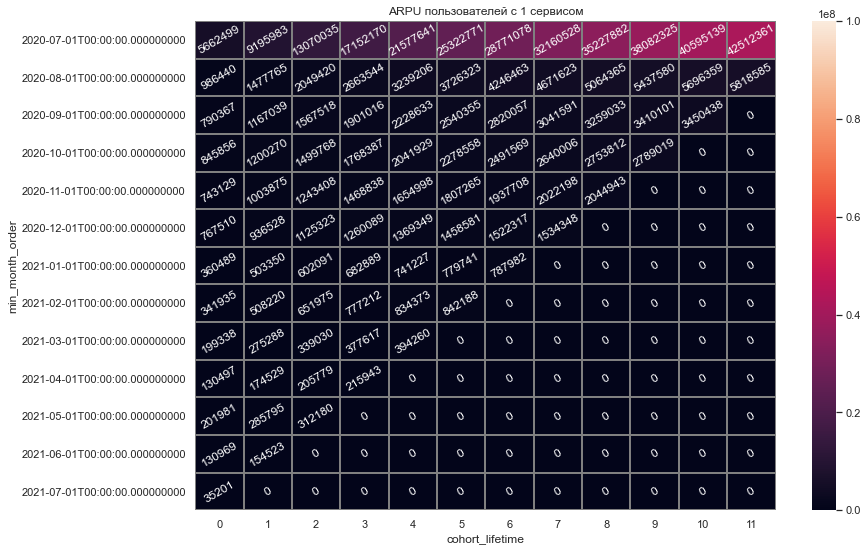

In [31]:
# Изменение ARPU
pivot_ARPU_1 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='ARPU', aggfunc='mean').cumsum(axis=1) 
pivot_ARPU_1 = pivot_ARPU_1.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('ARPU пользователей с 1 сервисом')
ax = sns.heatmap(pivot_ARPU_1, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.0f', linewidths=1, linecolor='gray', vmax=100000000) 
#ticklabels = [ARPU_dinamic.min_month_order[int(tick)].strftime('%Y-%m-%d') for tick in ax.get_yticks()]
#ax.set_yticklabels(ticklabels)
None

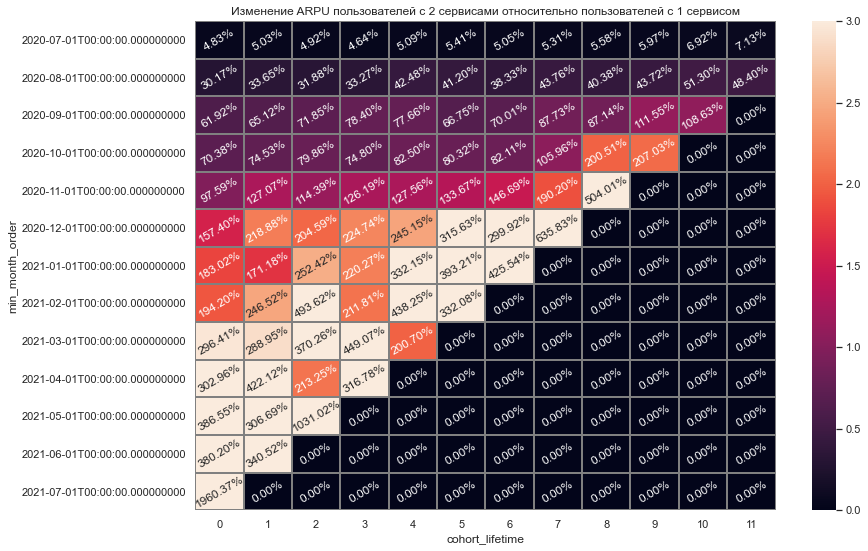

In [32]:
# Изменение ARPU после использования 2х сервисов
pivot_ARPU_2 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='ARPU_cum_after_2', aggfunc='mean') 
pivot_ARPU_2 = pivot_ARPU_2.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('Изменение ARPU пользователей с 2 сервисами относительно пользователей с 1 сервисом')
ax = sns.heatmap(pivot_ARPU_2, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.2%', linewidths=1, linecolor='gray', vmax=3) 

None

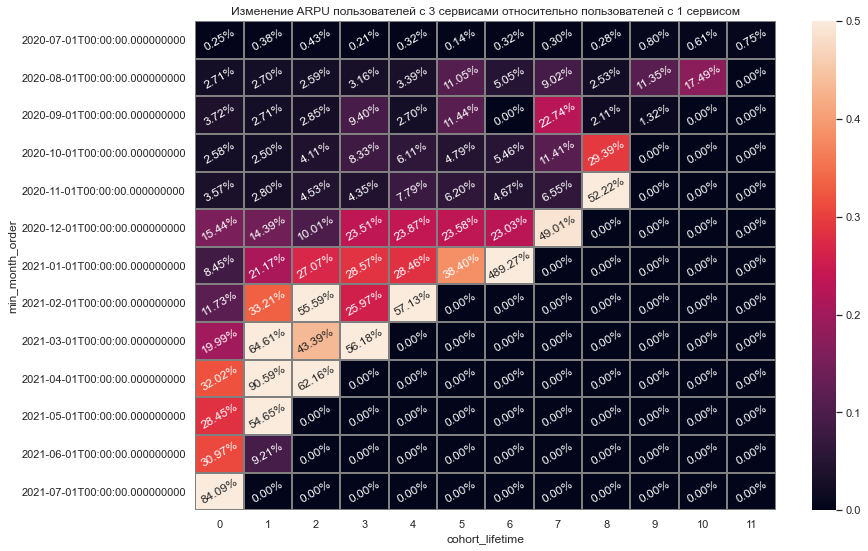

In [33]:
# Изменение ARPU после использования 3х сервисов
pivot_ARPU_3 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='ARPU_cum_after_3', aggfunc='mean') 
pivot_ARPU_3 = pivot_ARPU_3.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('Изменение ARPU пользователей с 3 сервисами относительно пользователей с 1 сервисом')
ax = sns.heatmap(pivot_ARPU_3, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.2%', linewidths=1, linecolor='gray', vmax=0.5) 

None

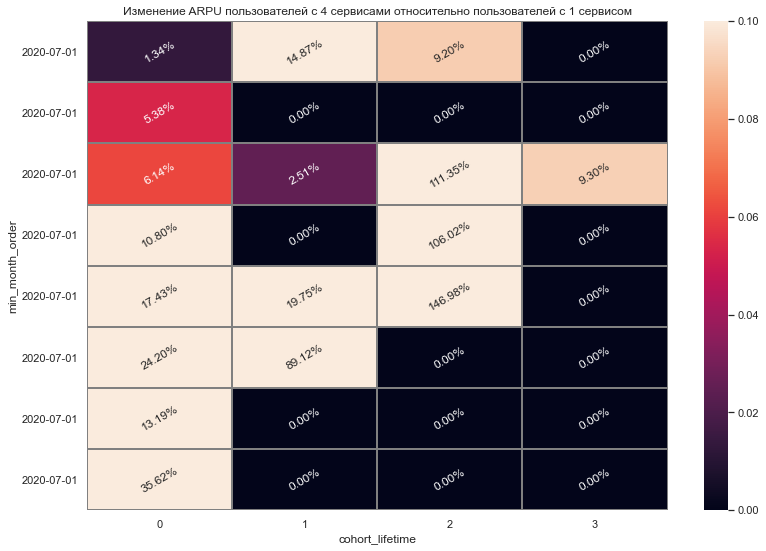

In [34]:
# Изменение ARPU после использования 4х сервисов
pivot_ARPU_4 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='ARPU_cum_after_4', aggfunc='mean') 
pivot_ARPU_4 = pivot_ARPU_4.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('Изменение ARPU пользователей с 4 сервисами относительно пользователей с 1 сервисом')
ax = sns.heatmap(pivot_ARPU_4, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.2%', linewidths=1, linecolor='gray', vmax=0.1) 
ticklabels = [ARPU_dinamic.min_month_order[int(tick)].strftime('%Y-%m-%d') for tick in ax.get_yticks()]
ax.set_yticklabels(ticklabels)

None

In [35]:
# Изменение ARPU после использования 5 сервисов
pivot_ARPU_5 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='ARPU_cum_after_5', aggfunc='mean') 
pivot_ARPU_5


Empty DataFrame
Columns: []
Index: []

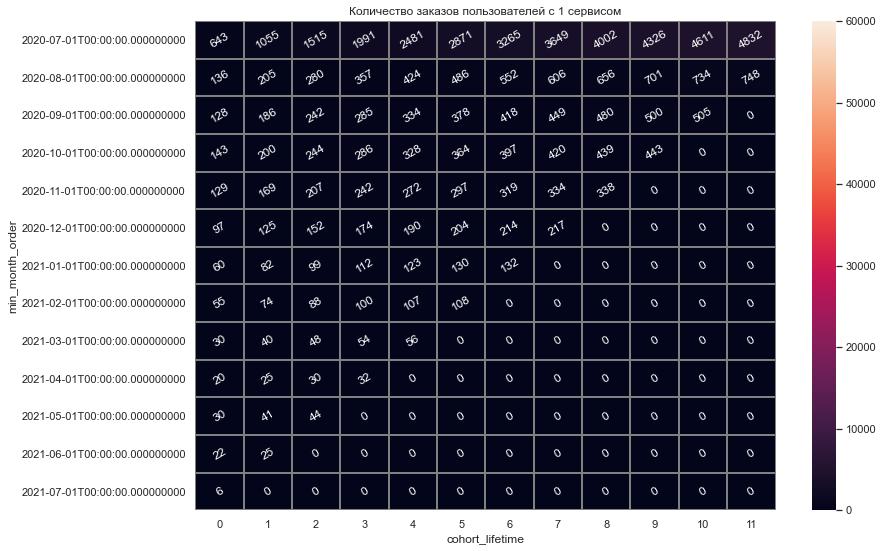

In [36]:
# Изменение количества заказов
pivot_orders_1 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='number_orders', aggfunc='mean').cumsum(axis=1) 
pivot_orders_1 = pivot_orders_1.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('Количество заказов пользователей с 1 сервисом')
ax = sns.heatmap(pivot_orders_1, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.0f', linewidths=1, linecolor='gray', vmax=60000) 
#ticklabels = [ARPU_dinamic.min_month_order[int(tick)].strftime('%Y-%m-%d') for tick in ax.get_yticks()]
#ax.set_yticklabels(ticklabels)
None

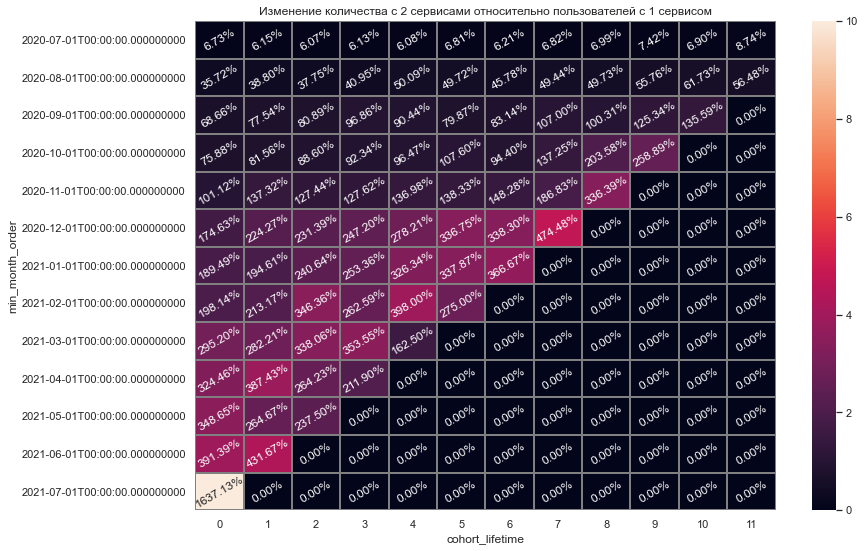

In [37]:
# Изменение количества заказов после использования 2х сервисов
pivot_orders_2 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='number_cum_orders_2', aggfunc='mean') 
pivot_orders_2 = pivot_orders_2.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('Изменение количества с 2 сервисами относительно пользователей с 1 сервисом')
ax = sns.heatmap(pivot_orders_2, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.2%', linewidths=1, linecolor='gray', vmax=10) 

None

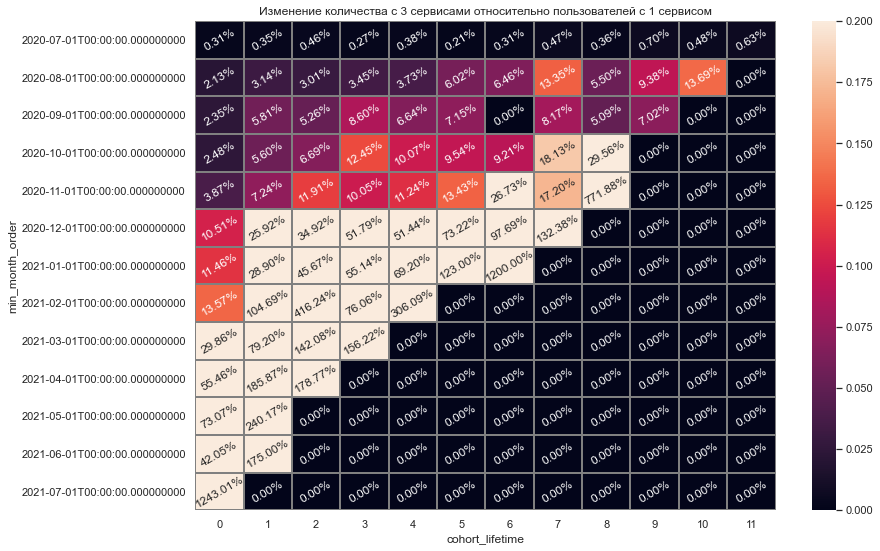

In [38]:
# Изменение количества заказов после использования 3х сервисов
pivot_orders_3 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='number_cum_orders_3', aggfunc='mean') 
pivot_orders_3 = pivot_orders_3.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('Изменение количества с 3 сервисами относительно пользователей с 1 сервисом')
ax = sns.heatmap(pivot_orders_3, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.2%', linewidths=1, linecolor='gray', vmax=0.2) 

None

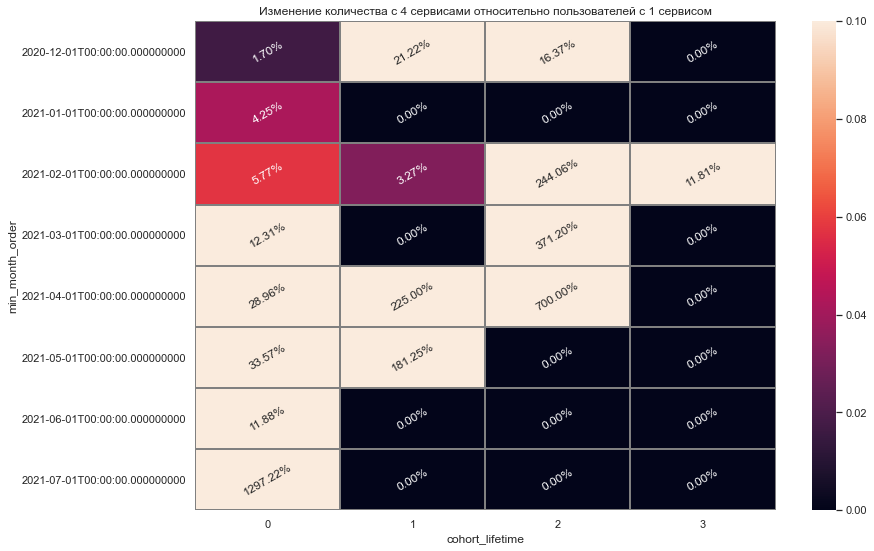

In [39]:
# Изменение количества заказов после использования 4х сервисов
pivot_orders_4 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='number_cum_orders_4', aggfunc='mean') 
pivot_orders_4 = pivot_orders_4.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('Изменение количества с 4 сервисами относительно пользователей с 1 сервисом')
ax = sns.heatmap(pivot_orders_4, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.2%', linewidths=1, linecolor='gray', vmax=0.1) 

None

In [40]:
# Изменение количества заказов после использования 5 сервисов
pivot_orders_5 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='number_cum_orders_5', aggfunc='mean') 
pivot_orders_5 

Empty DataFrame
Columns: []
Index: []

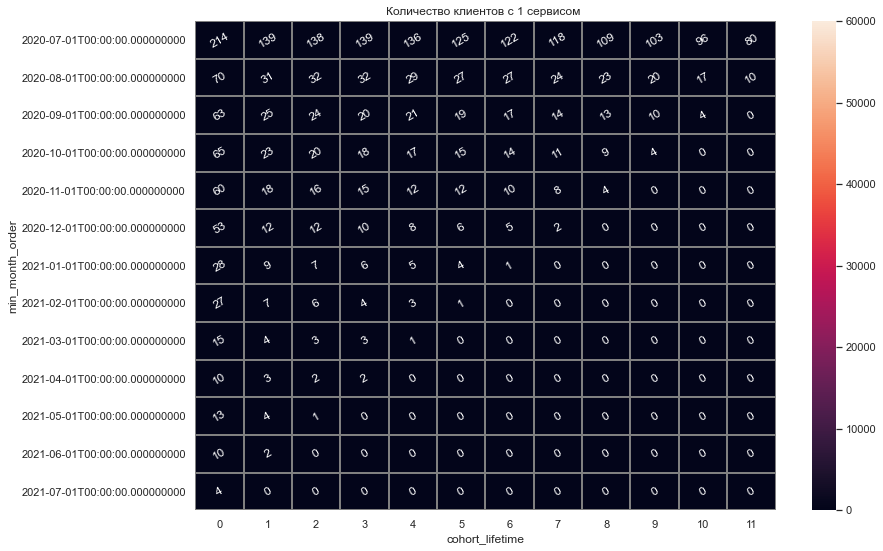

In [41]:
# Изменение количества клиентов

pivot_user_id_1 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='number_user_id', aggfunc='mean')
pivot_user_id_1 = pivot_user_id_1.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('Количество клиентов с 1 сервисом ')
ax = sns.heatmap(pivot_user_id_1, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.0f', linewidths=1, linecolor='gray', vmax=60000) 
#ticklabels = [ARPU_dinamic.min_month_order[int(tick)].strftime('%Y-%m-%d') for tick in ax.get_yticks()]
#ax.set_yticklabels(ticklabels)
None

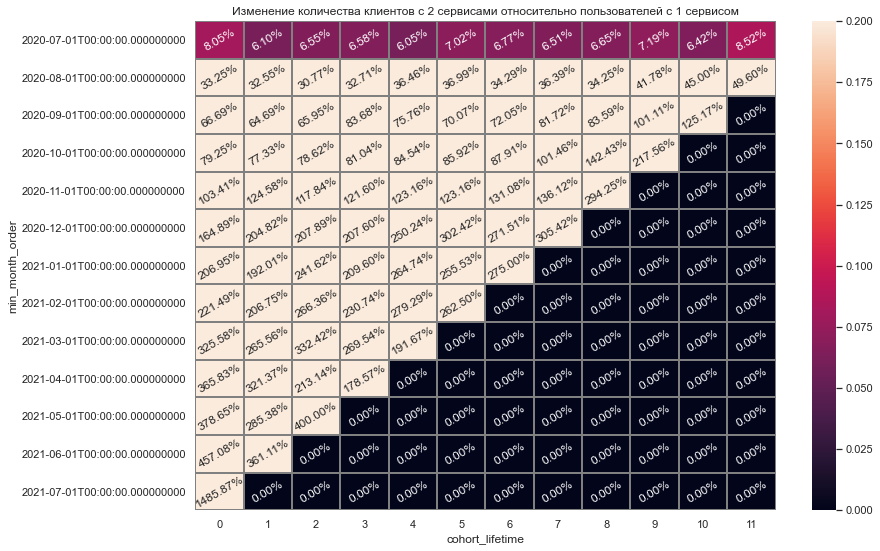

In [42]:
# Изменение количества клиентов после использования 2 сервисов
pivot_user_id_2 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='number_user_id_din_2', aggfunc='mean') 
pivot_user_id_2 = pivot_user_id_2.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('Изменение количества клиентов с 2 сервисами относительно пользователей с 1 сервисом')
ax = sns.heatmap(pivot_user_id_2, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.2%', linewidths=1, linecolor='gray', vmax=0.2) 

None

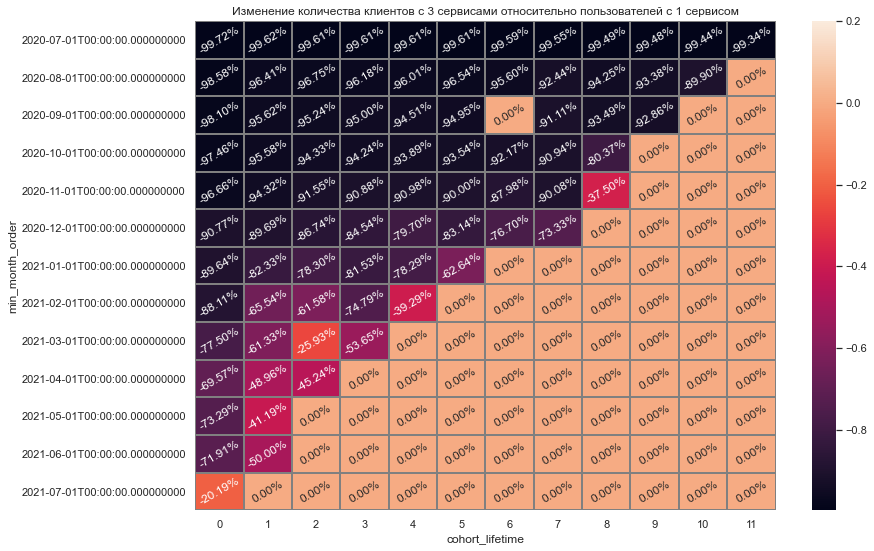

In [43]:
# Изменение количества клиентов после использования 3 сервисов
pivot_user_id_3 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='number_user_id_din_3', aggfunc='mean') 
pivot_user_id_3 = pivot_user_id_3.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('Изменение количества клиентов с 3 сервисами относительно пользователей с 1 сервисом')
ax = sns.heatmap(pivot_user_id_3, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.2%', linewidths=1, linecolor='gray', vmax=0.2) 

None

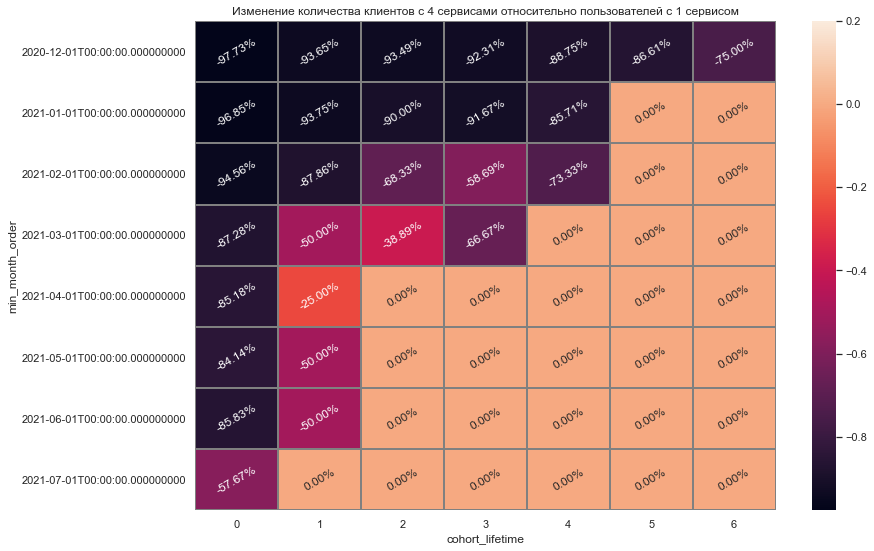

In [44]:
# Изменение количества клиентов после использования 4 сервисов
pivot_user_id_4 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='number_user_id_din_4', aggfunc='mean') 
pivot_user_id_4 = pivot_user_id_4.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('Изменение количества клиентов с 4 сервисами относительно пользователей с 1 сервисом')
ax = sns.heatmap(pivot_user_id_4, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.2%', linewidths=1, linecolor='gray', vmax=0.2) 

None

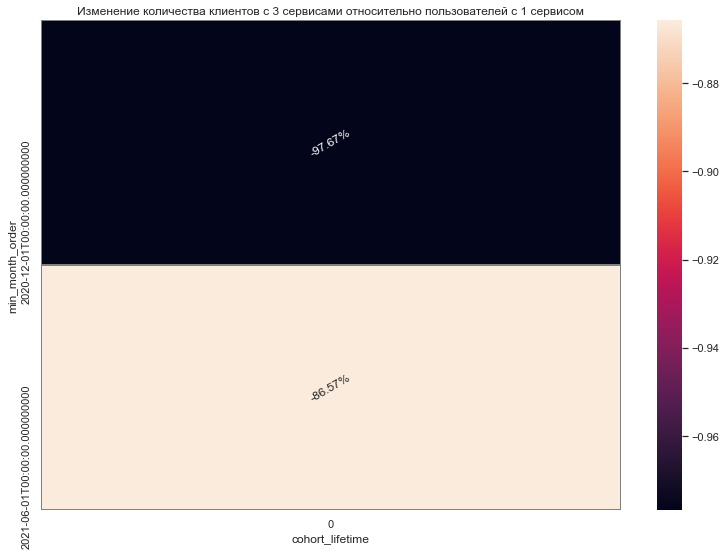

In [45]:
# Изменение количества клиентов после использования 4 сервисов
pivot_user_id_5 = ARPU_dinamic.pivot_table(index='min_month_order', 
                                        columns='cohort_lifetime', 
                                        values='number_user_id_din_5', aggfunc='mean') 
pivot_user_id_5 = pivot_user_id_5.fillna(0) 
sns.set(style='white')
ax = plt.figure(figsize=(13, 9))
plt.title('Изменение количества клиентов с 3 сервисами относительно пользователей с 1 сервисом')
ax = sns.heatmap(pivot_user_id_5, annot=True, 
            annot_kws={'fontsize':12, 'rotation':30}, 
            fmt='.2%', linewidths=1, linecolor='gray') 

None

In [46]:
# Посмотрим популярные девайсы и сервисы первой половины 2021 года
ARPU_data_total = ARPU_data_total.merge(sourse, on=['user_id', 'date'],how = 'left' )
ARPU_data_total.head()

index        user_id       date  reciept_cost     cat_delv min_month_order  \
0      0  8903271874564 2021-01-11        5613.3  storage_msk      2020-08-01   
1      1  8848493969412 2021-01-11        5787.0  storage_msk      2020-07-01   
2      2  8904413380612 2021-01-11        4477.0  storage_msk      2020-09-01   
3      3  8899019898884 2021-01-11        5819.4  storage_msk      2020-07-01   
4      4  8847277817860 2021-01-11       15321.1  storage_msk      2020-08-01   

  min_date_order date_cat_delv_1 date_cat_delv_2 date_cat_delv_3  \
0     2020-08-25      2020-08-25             NaT             NaT   
1     2020-07-20      2020-07-20             NaT             NaT   
2     2020-09-24             NaT      2020-09-17             NaT   
3     2020-07-19      2020-07-19             NaT             NaT   
4     2020-08-26      2020-08-26             NaT             NaT   

  date_cat_delv_4 date_cat_delv_5 order_month  cohort_lifetime dataSource  
0             NaT             NaT  2021-01-01                4        app  
1             NaT             NaT  2021-01-01                5        app  
2             NaT             NaT  2021-01-01                3        app  
3             NaT             NaT  2021-01-01                5        app  
4             NaT             NaT  2021-01-01                4        app

In [47]:
# Распределение заказов по девайсам и сервисам
ARPU_data_2021 = ARPU_data_total.query('date >= "2021-01-11"')
ARPU_data_2021 = ARPU_data_2021.groupby(['dataSource', 'cat_delv']).agg({'date':'count', 'user_id':'nunique'})
ARPU_data_2021.columns = ['orders_numb', 'users_numb']
ARPU_data_2021

orders_numb  users_numb
dataSource cat_delv                            
app        omni_msk           46956        7415
           omni_spb            3891         788
           pickup               716         217
           spec                  26          19
           storage_msk        35829        5644
           storage_spb         3320         674
mobile     omni_msk            6981        1687
           omni_spb             672         221
           pickup                99          76
           spec                 283         157
           storage_msk         8250        1896
           storage_spb         1127         264
web        omni_msk           15524        3350
           omni_spb            1529         406
           pickup               175         119
           spec                 443         252
           storage_msk        26697        4266
           storage_spb         2657         481

### Вывод

При рассмотрении тепловых карт можно отметить следующее:
- при переходе от 1 сервиса к 2 ARPU имеет уверенную тенденцию роста
- при дальнейшем увеличении количества сервисов(от 3 к 5) тенденция роста изменяется на снижение ARPU начиная с 0 меясца
- ситуация с количеством заказов при переходе от 1 сервиса к 2 аналогична ARPU
- при дальнейшем увеличении количества сервисов(от 3 к 5) тенденция роста сменяется на снижение начиная с 0 меясца
- количество пользователей при изменениии сервисов стабильно уменьшается

    Также стоит отметить необычное поведение когорт первой половины половины 2021 года. Их показатели значительно хуже, чем показатели когорт второй половины 2020 года. Возможно данное явление связано с экономической и социальной обстановкой. 

In [48]:
ARPU_data_total['order_number'] =1

In [49]:
frequency_orders = ARPU_data_total.groupby(['user_id', 'cohort_lifetime'])['order_number'].sum().reset_index()
frequency_orders = round(frequency_orders.groupby(['user_id'])['order_number'].mean(), 0).astype('int').reset_index()
frequency_orders.columns = ['user_id', 'frequency_orders']
frequency_orders.head()

user_id  frequency_orders
0  8799688032260                 3
1  8799688458244                 2
2  8799688523780                 2
3  8799689539588                 2
4  8799692226564                 2

In [50]:
ARPU_data_total = ARPU_data_total.merge(frequency_orders, on = 'user_id', how = 'left')
ARPU_data_total.head()

index        user_id       date  reciept_cost     cat_delv min_month_order  \
0      0  8903271874564 2021-01-11        5613.3  storage_msk      2020-08-01   
1      1  8848493969412 2021-01-11        5787.0  storage_msk      2020-07-01   
2      2  8904413380612 2021-01-11        4477.0  storage_msk      2020-09-01   
3      3  8899019898884 2021-01-11        5819.4  storage_msk      2020-07-01   
4      4  8847277817860 2021-01-11       15321.1  storage_msk      2020-08-01   

  min_date_order date_cat_delv_1 date_cat_delv_2 date_cat_delv_3  \
0     2020-08-25      2020-08-25             NaT             NaT   
1     2020-07-20      2020-07-20             NaT             NaT   
2     2020-09-24             NaT      2020-09-17             NaT   
3     2020-07-19      2020-07-19             NaT             NaT   
4     2020-08-26      2020-08-26             NaT             NaT   

  date_cat_delv_4 date_cat_delv_5 order_month  cohort_lifetime dataSource  \
0             NaT             NaT  2021-01-01                4        app   
1             NaT             NaT  2021-01-01                5        app   
2             NaT             NaT  2021-01-01                3        app   
3             NaT             NaT  2021-01-01                5        app   
4             NaT             NaT  2021-01-01                4        app   

   order_number  frequency_orders  
0             1                 1  
1             1                 5  
2             1                 2  
3             1                 7  
4             1                11

In [51]:
users_date_serv = ARPU_data_total.groupby(['user_id']).agg({'date_cat_delv_1':'min',
                                                          'date_cat_delv_2':'min',
                                                          'date_cat_delv_3':'min',
                                                          'date_cat_delv_4':'min',
                                                          'date_cat_delv_5':'min'}).reset_index()
users_date_serv.head()

user_id date_cat_delv_1 date_cat_delv_2 date_cat_delv_3  \
0  8799688032260      2020-10-08      2020-10-08             NaT   
1  8799688458244      2020-07-23      2020-07-23             NaT   
2  8799688523780      2020-11-04      2020-11-04             NaT   
3  8799689539588      2020-10-10      2020-10-10             NaT   
4  8799692226564      2020-11-21      2020-11-21             NaT   

  date_cat_delv_4 date_cat_delv_5  
0             NaT             NaT  
1             NaT             NaT  
2             NaT             NaT  
3             NaT             NaT  
4             NaT             NaT

In [52]:
ARPU_data_total.drop(['date_cat_delv_1', 'date_cat_delv_2', 'date_cat_delv_3', 
                      'date_cat_delv_4', 'date_cat_delv_5'], inplace=True, axis=1)
ARPU_data_total = ARPU_data_total.merge(users_date_serv, on = 'user_id', how ='left')
ARPU_data_total.sample(10)

index        user_id       date  reciept_cost     cat_delv  \
47471    42022  8905179693060 2021-06-19       4045.00     omni_msk   
4336      3821  8832435224580 2020-10-06       5190.60     omni_msk   
6413      5712  8802672214020 2020-10-19       4525.78  storage_msk   
266110  236687  8805563531268 2021-01-23       7560.80     omni_msk   
93659    83287  8802211495940 2021-02-03       4536.52     omni_msk   
220885  196266  8908233179140 2020-11-13       5116.00     omni_msk   
166942  148558  8926019584004 2021-01-16       7406.35  storage_msk   
78694    70240  8802655698948 2021-03-30       2121.70     omni_msk   
252281  224223  8802288402436 2021-02-16      14700.30  storage_msk   
61135    54482  8802094055428 2021-05-05      15055.00  storage_msk   

       min_month_order min_date_order order_month  cohort_lifetime dataSource  \
47471       2021-06-01     2021-06-19  2021-06-01                0        app   
4336        2020-09-01     2020-09-09  2020-10-01                0        web   
6413        2020-07-01     2020-07-18  2020-10-01                3        web   
266110      2020-11-01     2020-11-29  2021-01-01                1     mobile   
93659       2020-09-01     2020-09-21  2021-02-01                4     mobile   
220885      2020-08-01     2020-08-12  2020-11-01                3        web   
166942      2021-01-01     2021-01-16  2021-01-01                0        web   
78694       2020-10-01     2020-10-11  2021-03-01                5        web   
252281      2020-07-01     2020-07-16  2021-02-01                7        app   
61135       2020-08-01     2020-08-17  2021-05-01                8        app   

        order_number  frequency_orders date_cat_delv_1 date_cat_delv_2  \
47471              1                 5      2020-09-24      2020-09-24   
4336               1                 5      2020-07-14      2020-07-14   
6413               1                 2      2020-07-18      2020-07-18   
266110             1                 3      2020-11-29      2020-11-29   
93659              1                 7      2020-09-09      2020-09-09   
220885             1                 2      2020-08-12      2020-08-12   
166942             1                 2      2020-08-04      2020-08-04   
78694              1                 4      2020-07-17      2020-07-17   
252281             1                 2      2020-07-16      2020-07-16   
61135              1                 2      2020-08-17      2020-08-17   

       date_cat_delv_3 date_cat_delv_4 date_cat_delv_5  
47471              NaT             NaT             NaT  
4336               NaT             NaT             NaT  
6413        2021-01-13             NaT             NaT  
266110             NaT             NaT             NaT  
93659              NaT             NaT             NaT  
220885             NaT             NaT             NaT  
166942      2021-01-16             NaT             NaT  
78694              NaT             NaT             NaT  
252281             NaT             NaT             NaT  
61135              NaT             NaT             NaT

In [53]:
# Фильтруем от лишних заказов и собираем группу с 1 сервисом
triggers_1 = ARPU_data_total[ARPU_data_total['date'] <= ARPU_data_total['date_cat_delv_2']]
orders_list_1 = triggers_1['index'].unique()
triggers_1 = triggers_1.groupby(['user_id', 'cat_delv']).agg({'reciept_cost': 'sum', 
                                                              'order_number' : 'sum', 
                                                              'frequency_orders': 'mean'})
triggers_1['average_receipt_1'] = round(triggers_1['reciept_cost'] / triggers_1['order_number'], 2)
triggers_1 = triggers_1.reset_index() 
triggers_1.columns = ['user_id', 'cat_delv_1', 'ARPU_1', 'orders_number_1',  'frequency_orders_1', 'average_receipt_1']
triggers_1 = triggers_1[['user_id', 'average_receipt_1', 'frequency_orders_1','orders_number_1', 'cat_delv_1', 'ARPU_1']]
triggers_1.head()

user_id  average_receipt_1  frequency_orders_1  orders_number_1  \
0  8799688032260           14276.10                   3                1   
1  8799688032260           10886.00                   3                1   
2  8799688458244           11159.34                   2                1   
3  8799688523780            2717.00                   2                1   
4  8799689539588            7727.40                   2                2   

    cat_delv_1    ARPU_1  
0     omni_msk  14276.10  
1  storage_msk  10886.00  
2  storage_msk  11159.34  
3     omni_msk   2717.00  
4     omni_msk  15454.80

In [54]:
# Фильтруем от лишних заказов и собираем группу с 2 сервисами
orders_list_2 = ARPU_data_total[~ARPU_data_total['date_cat_delv_3'].isna()]['index'].unique()

triggers_2 = ARPU_data_total[(ARPU_data_total['date'] > ARPU_data_total['date_cat_delv_2'])]
triggers_2 = triggers_2[(~triggers_2['index'].isin(orders_list_2)) & (~triggers_2['index'].isin(orders_list_1))]



In [55]:
triggers_2 = triggers_2.groupby(['user_id', 'cat_delv']).agg({'reciept_cost': 'sum', 
                                                              'order_number' : 'sum', 
                                                              'frequency_orders': 'mean'})
triggers_2 = triggers_2.reset_index() 

mist = triggers_2.groupby(['user_id'])['cat_delv'].count().reset_index()
mist = mist[mist['cat_delv']>2]['user_id'].unique()
triggers_2 = triggers_2[~triggers_2['user_id'].isin(mist)]

In [56]:
triggers_2['average_receipt_2'] = round(triggers_2['reciept_cost'] / triggers_2['order_number'], 2)

triggers_2.columns = ['user_id', 'cat_delv_2', 'ARPU_2', 'orders_number_2', 'frequency_orders_2','average_receipt_2']
triggers_2 = triggers_2[['user_id', 'average_receipt_2', 'frequency_orders_2','orders_number_2', 'cat_delv_2', 'ARPU_2']]
triggers_2.head()

user_id  average_receipt_2  frequency_orders_2  orders_number_2  \
0  8799688032260            9390.61                   3               15   
1  8799688032260           16066.01                   3                8   
2  8799688458244            3901.00                   2                4   
3  8799688458244            9575.63                   2                8   
4  8799688523780            4868.70                   2                1   

    cat_delv_2     ARPU_2  
0     omni_msk  140859.12  
1  storage_msk  128528.08  
2     omni_msk   15603.99  
3  storage_msk   76605.02  
4  storage_msk    4868.70

In [57]:
# Группируем по пользователю
triggers_2 = triggers_2.groupby(['user_id']).agg({'cat_delv_2':'unique', 
                                                  'orders_number_2':'sum', 
                                                  'average_receipt_2':'mean', 
                                                  'ARPU_2': 'sum', 'frequency_orders_2': 'mean'}).reset_index()

triggers_2['cat_delv_2'] = triggers_2.apply(lambda x: ",".join(x['cat_delv_2']),axis=1)
triggers_2.head()

user_id            cat_delv_2  orders_number_2  average_receipt_2  \
0  8799688032260  omni_msk,storage_msk               23          12728.310   
1  8799688458244  omni_msk,storage_msk               12           6738.315   
2  8799688523780           storage_msk                1           4868.700   
3  8799689539588           storage_msk                7           6513.880   
4  8799692226564              omni_msk                1          32280.000   

      ARPU_2  frequency_orders_2  
0  269387.20                   3  
1   92209.01                   2  
2    4868.70                   2  
3   45597.15                   2  
4   32280.00                   2

In [58]:
triggers = triggers_1.merge(triggers_2, on = 'user_id', how = 'left')
triggers.head()


user_id  average_receipt_1  frequency_orders_1  orders_number_1  \
0  8799688032260           14276.10                   3                1   
1  8799688032260           10886.00                   3                1   
2  8799688458244           11159.34                   2                1   
3  8799688523780            2717.00                   2                1   
4  8799689539588            7727.40                   2                2   

    cat_delv_1    ARPU_1            cat_delv_2  orders_number_2  \
0     omni_msk  14276.10  omni_msk,storage_msk             23.0   
1  storage_msk  10886.00  omni_msk,storage_msk             23.0   
2  storage_msk  11159.34  omni_msk,storage_msk             12.0   
3     omni_msk   2717.00           storage_msk              1.0   
4     omni_msk  15454.80           storage_msk              7.0   

   average_receipt_2     ARPU_2  frequency_orders_2  
0          12728.310  269387.20                 3.0  
1          12728.310  269387.20                 3.0  
2           6738.315   92209.01                 2.0  
3           4868.700    4868.70                 2.0  
4           6513.880   45597.15                 2.0

In [59]:
triggers.loc[(triggers['cat_delv_2']=='omni_msk') | (triggers['cat_delv_2']=='storage_msk'),
                     'cat_delv_2'] = 'omni_msk,storage_msk'
triggers.loc[(triggers['cat_delv_2']=='omni_spb') | (triggers['cat_delv_2']=='storage_spb'), 
                     'cat_delv_2'] = 'omni_spb,storage_spb'
triggers.loc[(triggers['cat_delv_2']=='spec') | (triggers['cat_delv_2']=='pickup'), 
                     'cat_delv_2'] = 'pickup,spec'


In [60]:
triggers['change_average_receipt'] = round(triggers['average_receipt_2'] / triggers['average_receipt_1'],2)
triggers['change_frequency_orders'] = triggers['frequency_orders_2'] / triggers['frequency_orders_1']
triggers['change_orders_number'] = triggers['orders_number_2'] / triggers['orders_number_1']
triggers['change_ARPU'] = round(triggers['ARPU_2'] / triggers['ARPU_1'], 2)


triggers.head()

user_id  average_receipt_1  frequency_orders_1  orders_number_1  \
0  8799688032260           14276.10                   3                1   
1  8799688032260           10886.00                   3                1   
2  8799688458244           11159.34                   2                1   
3  8799688523780            2717.00                   2                1   
4  8799689539588            7727.40                   2                2   

    cat_delv_1    ARPU_1            cat_delv_2  orders_number_2  \
0     omni_msk  14276.10  omni_msk,storage_msk             23.0   
1  storage_msk  10886.00  omni_msk,storage_msk             23.0   
2  storage_msk  11159.34  omni_msk,storage_msk             12.0   
3     omni_msk   2717.00  omni_msk,storage_msk              1.0   
4     omni_msk  15454.80  omni_msk,storage_msk              7.0   

   average_receipt_2     ARPU_2  frequency_orders_2  change_average_receipt  \
0          12728.310  269387.20                 3.0                    0.89   
1          12728.310  269387.20                 3.0                    1.17   
2           6738.315   92209.01                 2.0                    0.60   
3           4868.700    4868.70                 2.0                    1.79   
4           6513.880   45597.15                 2.0                    0.84   

   change_frequency_orders  change_orders_number  change_ARPU  
0                      1.0                  23.0        18.87  
1                      1.0                  23.0        24.75  
2                      1.0                  12.0         8.26  
3                      1.0                   1.0         1.79  
4                      1.0                   3.5         2.95

In [61]:
# Средний чек разобьем по группам
print('MAX средний чек 1 сервиса', triggers['average_receipt_1'].max())
print('MIN средний чек 1 сервиса', triggers['average_receipt_1'].min())
print('MEAN средний чек 1 сервиса', triggers['average_receipt_1'].mean())
print('MIDEAN средний чек 1 сервиса', triggers['average_receipt_1'].median())
print()
print('MAX средний чек 2 сервисов', triggers['average_receipt_2'].max())
print('MIN средний чек 2 сервисов', triggers['average_receipt_2'].min())
print('MEAN средний чек 2 сервисов', triggers['average_receipt_2'].mean())
print('MIDEAN средний чек 2 сервисов', triggers['average_receipt_2'].median())


MAX средний чек 1 сервиса 676210.0
MIN средний чек 1 сервиса 159.0
MEAN средний чек 1 сервиса 7087.992001719615
MIDEAN средний чек 1 сервиса 5312.3

MAX средний чек 2 сервисов 132500.0
MIN средний чек 2 сервисов 133.0
MEAN средний чек 2 сервисов 6236.2156438522015
MIDEAN средний чек 2 сервисов 5267.610000000001


In [62]:
triggers = triggers[triggers['average_receipt_1']<300000] 
triggers = triggers[triggers['ARPU_1']<300000] 

In [63]:
def average_receipt_cat (receipt):
    if receipt <= 2000:
        return 'до 2000'
    if receipt <= 10000:
        return 'до 10000'
    if receipt <= 50000:
        return 'до 50000'
    if receipt <= 100000:
        return 'до 100000'
    return 'свыше 100000' 

triggers['average_receipt_cat'] = triggers['average_receipt_1'].apply(average_receipt_cat)
triggers.head()

user_id  average_receipt_1  frequency_orders_1  orders_number_1  \
0  8799688032260           14276.10                   3                1   
1  8799688032260           10886.00                   3                1   
2  8799688458244           11159.34                   2                1   
3  8799688523780            2717.00                   2                1   
4  8799689539588            7727.40                   2                2   

    cat_delv_1    ARPU_1            cat_delv_2  orders_number_2  \
0     omni_msk  14276.10  omni_msk,storage_msk             23.0   
1  storage_msk  10886.00  omni_msk,storage_msk             23.0   
2  storage_msk  11159.34  omni_msk,storage_msk             12.0   
3     omni_msk   2717.00  omni_msk,storage_msk              1.0   
4     omni_msk  15454.80  omni_msk,storage_msk              7.0   

   average_receipt_2     ARPU_2  frequency_orders_2  change_average_receipt  \
0          12728.310  269387.20                 3.0                    0.89   
1          12728.310  269387.20                 3.0                    1.17   
2           6738.315   92209.01                 2.0                    0.60   
3           4868.700    4868.70                 2.0                    1.79   
4           6513.880   45597.15                 2.0                    0.84   

   change_frequency_orders  change_orders_number  change_ARPU  \
0                      1.0                  23.0        18.87   
1                      1.0                  23.0        24.75   
2                      1.0                  12.0         8.26   
3                      1.0                   1.0         1.79   
4                      1.0                   3.5         2.95   

  average_receipt_cat  
0            до 50000  
1            до 50000  
2            до 50000  
3            до 10000  
4            до 10000

In [64]:
triggers.to_csv('D://Kseniia//AV//tableu_triggers_1.csv', index=False)

In [65]:
# Построим график для 1 сервиса

fig = px.scatter(triggers, x="orders_number_1", y="ARPU_1", size="average_receipt_1", color="cat_delv_1",
                 hover_name="user_id", log_x=True, size_max=60, labels={"cat_delv_1": "Используемый сервис"})
fig.update_xaxes(title_text='Количество заказов до перехода к следующему сервису')
fig.update_yaxes(title_text='ARPU клиента')
fig.update_layout(
    title={
        'text': "Набор характеристик клиента при использовании 1 сервиса",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [67]:
# Построим график для 2 сервисов
triggers_graph_2 = triggers[~triggers['cat_delv_2'].isna()]
#triggers_graph_2[['user_id', 'orders_number_2', 'ARPU_2', 'average_receipt_2', '']].to_csv('D://Kseniia//AV//tableu_triggers_2.csv', index=False)

In [68]:
triggers_graph_2.head()

user_id  average_receipt_1  frequency_orders_1  orders_number_1  \
0  8799688032260           14276.10                   3                1   
1  8799688032260           10886.00                   3                1   
2  8799688458244           11159.34                   2                1   
3  8799688523780            2717.00                   2                1   
4  8799689539588            7727.40                   2                2   

    cat_delv_1    ARPU_1            cat_delv_2  orders_number_2  \
0     omni_msk  14276.10  omni_msk,storage_msk             23.0   
1  storage_msk  10886.00  omni_msk,storage_msk             23.0   
2  storage_msk  11159.34  omni_msk,storage_msk             12.0   
3     omni_msk   2717.00  omni_msk,storage_msk              1.0   
4     omni_msk  15454.80  omni_msk,storage_msk              7.0   

   average_receipt_2     ARPU_2  frequency_orders_2  change_average_receipt  \
0          12728.310  269387.20                 3.0                    0.89   
1          12728.310  269387.20                 3.0                    1.17   
2           6738.315   92209.01                 2.0                    0.60   
3           4868.700    4868.70                 2.0                    1.79   
4           6513.880   45597.15                 2.0                    0.84   

   change_frequency_orders  change_orders_number  change_ARPU  \
0                      1.0                  23.0        18.87   
1                      1.0                  23.0        24.75   
2                      1.0                  12.0         8.26   
3                      1.0                   1.0         1.79   
4                      1.0                   3.5         2.95   

  average_receipt_cat  
0            до 50000  
1            до 50000  
2            до 50000  
3            до 10000  
4            до 10000

In [69]:
fig = px.scatter(triggers_graph_2, x="orders_number_2", y="ARPU_2", size="average_receipt_2", color="cat_delv_2",
                 hover_name="user_id", log_x=True, size_max=60, labels={"cat_delv_2": "Используемый сервис", 
                                                                       "average_receipt_2": "Средний чек",
                                                                       "ARPU_2": "ARPU",
                                                                       "orders_number_2": "Количество заказов"})
fig.update_xaxes(title_text='Количество заказов до перехода к следующему сервису')
fig.update_yaxes(title_text='ARPU клиента')
fig.update_layout(
    title={
        'text': "Набор характеристик клиента при использовании 2 сервисов",
        'y':0.95,
        'x':0.45,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()